In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import lmfit
from lmfit.model import ModelResult, save_model
from astropy.modeling import Fittable1DModel, Parameter
from astropy.modeling.fitting import LevMarLSQFitter

data_set = np.loadtxt ("Project_Data_Corrected.txt")

C:\Users\fortk\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#This just gathers the correct columns from the data set
flux_data= data_set[:,6]
wavelength= data_set[:,2]
date= data_set[:,1]
#Set minimum and maximum wavelength here
MinWavelength = 420
MaxWavelength = 445
#Set the date here (Julian Day Number)
Day = 2452744.0
Day2 = 2452750.0
print(flux_data)
print(wavelength)
print(date)

[0.041117 0.042352 0.043016 ... 0.       0.       0.      ]
[ 240.02  240.11  240.19 ... 2390.42 2401.4  2412.34]
[2452744. 2452744. 2452744. ... 2458905. 2458905. 2458905.]


In [3]:
Analysis = np.column_stack((flux_data, wavelength, date))
print(Analysis)

dat1 = []
dat2 = []
dat3 = []

for dat in Analysis:
    
    if dat[1] > MinWavelength and dat[1] < MaxWavelength and dat[2] == Day:
        dat1.append(dat)
    if dat[1] > MinWavelength and dat[1] < MaxWavelength and dat[2] == Day2:
        dat2.append(dat)
    if dat[1] == 434.31:
        dat3.append(dat)

[[4.111700e-02 2.400200e+02 2.452744e+06]
 [4.235200e-02 2.401100e+02 2.452744e+06]
 [4.301600e-02 2.401900e+02 2.452744e+06]
 ...
 [0.000000e+00 2.390420e+03 2.458905e+06]
 [0.000000e+00 2.401400e+03 2.458905e+06]
 [0.000000e+00 2.412340e+03 2.458905e+06]]


In [4]:
dat1 = np.array(dat1)
dat2 = np.array(dat2)
dat3 = np.array(dat3)

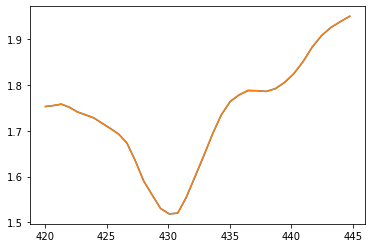

In [5]:
plt.plot(dat1[:,1],dat1[:,0])
plt.plot(dat2[:,1],dat2[:,0])

q1 = dat1[:,0]
q2 = dat2[:,0]

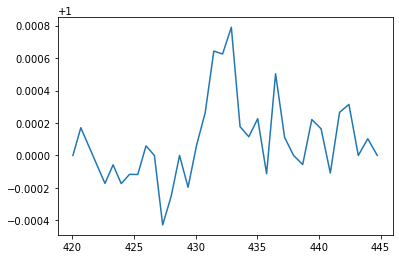

In [6]:
Q_Flux = q2/q1
plt.plot(dat1[:,1],Q_Flux)

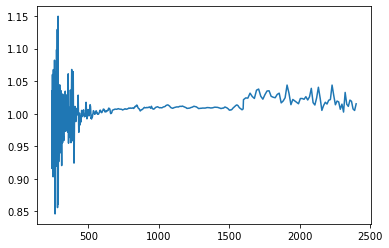

In [7]:
y1=flux_data[0:1216:1]
y2=flux_data[1218:2434:1]

Q_flux=y1/y2

plt.plot(wavelength[0:1216:1],Q_flux)

In [8]:
import numpy as np
from astropy import modeling

Q1 = np.subtract(Q_Flux,1)

In [39]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude = 0.0008, mean = 432.5, stddev = 1)   # depending on the data you need to give some initial values
f = fitter(model, dat1[:,1], Q1)
f2 = f(dat1[:,1])+1

Text(0.5, 0, 'Wavelength (nm)')

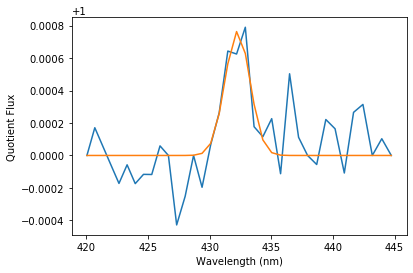

In [42]:
plt.plot(dat1[:,1],Q_Flux)
plt.plot(dat1[:,1],f2)
plt.ylabel('Quotient Flux')
plt.xlabel('Wavelength (nm)')

In [28]:
class sum_of_gaussians(Fittable1DModel):
    amp1 = Parameter()
    amp2 = Parameter()
    mean1 = Parameter()
    mean2 = Parameter()
    stdev1 = Parameter()
    stdev2 = Parameter()

    @staticmethod
    def evaluate(x, amp1, amp2, mean1, mean2, stdev1, stdev2):
        return (amp1 * np.exp((-(1 / (2. * stdev1**2)) * (x - mean1)**2)) + 
        amp2 * np.exp((-(1 / (2. * stdev2**2)) * (x - mean2)**2)) )

    @staticmethod
    def fit_deriv(x, amp1, amp2, mean1, mean2, stdev1, stdev2):
        d_amp1 = np.exp((-(1 / (stdev1**2)) * (x - mean1)**2))
        d_mean1 = (2 * amp1 *
                  np.exp((-(1 / (stdev1**2)) * (x - mean1)**2)) *
                  (x - mean1) / (stdev1**2))
        d_stdev1 = (2 * amp1 *
                    np.exp((-(1 / (stdev1**2)) * (x - mean1)**2)) *
                    ((x - mean1)**2) / (stdev1**3))
        d_amp2 = np.exp((-(1 / (stdev2**2)) * (x - mean2)**2))
        d_mean2 = (2 * amp2 *
                  np.exp((-(1 / (stdev2**2)) * (x - mean2)**2)) *
                  (x - mean2) / (stdev2**2))
        d_stdev2 = (2 * amp2 *
                    np.exp((-(1 / (stdev2**2)) * (x - mean2)**2)) *
                    ((x - mean2)**2) / (stdev2**3))
        
        return [d_amp1, d_amp2, d_mean1, d_mean2, d_stdev1 , d_stdev2] 




In [36]:
m_init = sum_of_gaussians(amp1 = .001, amp2 = -.00015, mean1 = 432.5, mean2 = 426, stdev1 = 1, stdev2 = 2)
fit = LevMarLSQFitter()
m = fit(m_init, dat1[:,1], Q1)
m2 = m(dat1[:,1])+1

Text(0.5, 0, 'Wavelength (nm)')

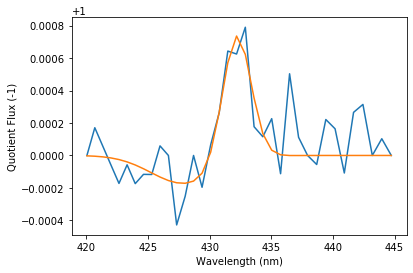

In [38]:
plt.plot(dat1[:,1],Q_Flux)
plt.plot(dat1[:,1],m2)
plt.ylabel('Quotient Flux')
plt.xlabel('Wavelength (nm)')